# Machine learning - Assignment 1 - Data preprocessing and manual introspection
____
**Author**: Kemal Cikota

**Course**: Machine learning
____

### Introduction

In this assignment, we were tasked with performing simple linear regression on different variables in the Boston housing market dataset. We would then extrapolate this linear regression method on several variables and in the end combine all of the variables in the same linear regression model. Conclusions and interpretations of the outputs will also be made in this notebook to make it clearer as to how and why certain calculations are computed and what their results indicate.

### Load the data and get an overview of the data

Like in the last assignment, we need to import all of our libraries, load the dataset and call some functions/commands in order to get an overview of the data. At this stage, a lot of code was reused from my A1 submission so thats why some commments and lines of code will look similar.

In [2]:
import pandas as pd # Never coded in R before but this seems to be the equivalent of library(pandas) in R
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# load boston.csv
boston = pd.read_csv('Boston.csv')

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

Once the dataset is loaded, we can display the number of predictors (variables/columns) and their names.

In [3]:
# This will print '15' and not '14' because it counts the first 'empty' column
numFeatures = boston.shape[1]
print(numFeatures)

featureNames = boston.columns.tolist()
print(featureNames, end="\n\n")


15
['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']



We can now print a statistic summary of the whole dataset, using the 'describe' function which is similar to 'summary' in R.

In [4]:
print(boston.describe(), end="\n\n")


       Unnamed: 0        crim          zn       indus        chas         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   253.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      1.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    127.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    253.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    379.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    506.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

We can now also print all of the datapoints in this dataset.

In [5]:
print("total amount of datapoints: ", boston.shape[0], end="\n\n")

total amount of datapoints:  506



At this stage, we have quite a good idea at how the data looks like. I did also find a good [source](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset) online that explains the dataset in further detail. The most important part for me was just to get an idea of what the columns actually mean which is important for the interpretation later.

However, now when we have a good overview, we can now plot some predictors against some response values using linear regression. For this, i decided to use the same variables as the example, which was lstat, rm and age.

At this stage i will plot the scatter plots with a linear regression line, confidence interval and correlation coefficient.

Correlation coefficient between medv and lstat:  -0.7376627261740147 , with p-value:  5.081103394387547e-88
Correlation coefficient between medv and rm:  0.6953599470715394 , with p-value:  2.4872288710071593e-74
Correlation coefficient between medv and age:  -0.37695456500459623 , with p-value:  1.5699822091877261e-18



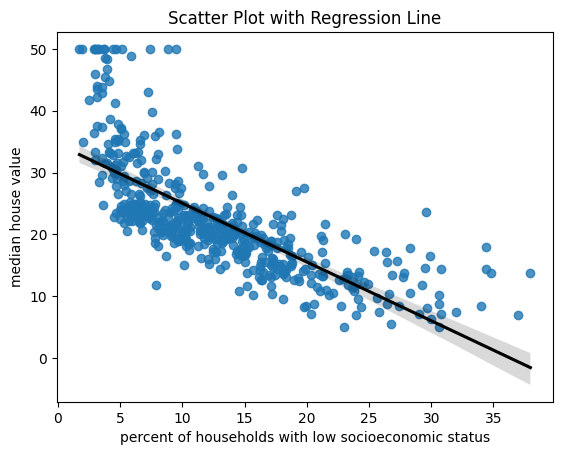

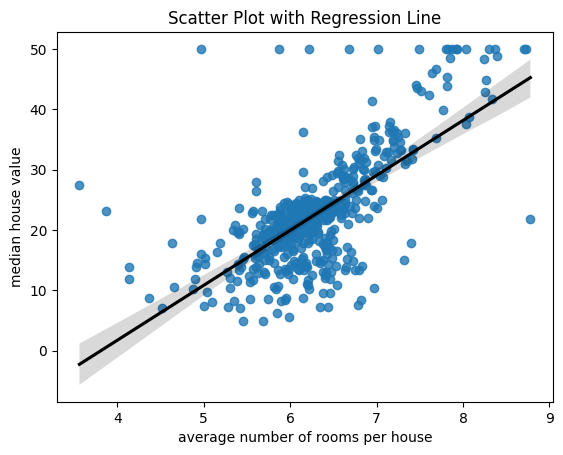

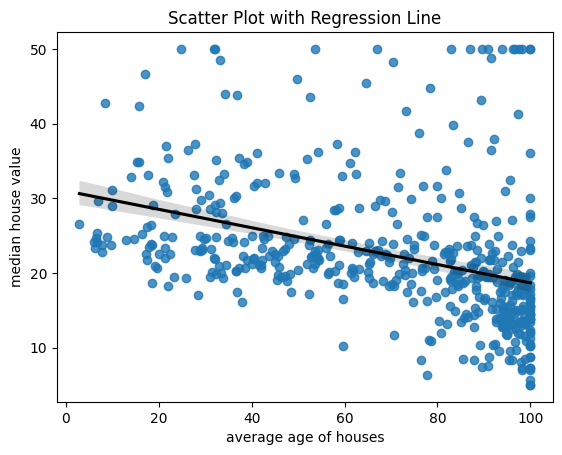

In [6]:

# correlation coefficients between our variables for the 3 plots
corCoef_medv_lstat, pValue_medv_lstat = stats.pearsonr(boston['medv'], boston['lstat'])
print("Correlation coefficient between medv and lstat: ", corCoef_medv_lstat, ", with p-value: ", pValue_medv_lstat)

corCoef_medv_lstat, pValue_medv_rm = stats.pearsonr(boston['medv'], boston['rm'])
print("Correlation coefficient between medv and rm: ", corCoef_medv_lstat, ", with p-value: ", pValue_medv_rm)

corCoef_medv_lstat, pValue_medv_age = stats.pearsonr(boston['medv'], boston['age'])
print("Correlation coefficient between medv and age: ", corCoef_medv_lstat, ", with p-value: ", pValue_medv_age, end="\n\n")

# Scatter plot with regression line between lstat and medv
sns.regplot(x=boston['lstat'], y=boston['medv'],  line_kws={'color': 'black'})

# Add labels to the plot
plt.xlabel("percent of households with low socioeconomic status")
plt.ylabel("median house value")
plt.title(f"Scatter Plot with Regression Line")
plt.show() # Remember to make the window bigger to see the plot

# Scatter plot with regression line between rm and medv
sns.regplot(x=boston['rm'], y=boston['medv'],  line_kws={'color': 'black'})

# Add labels to the plot
plt.xlabel("average number of rooms per house")
plt.ylabel("median house value")
plt.title(f"Scatter Plot with Regression Line")
plt.show()

# Scatter plot with regression line between age and medv
sns.regplot(x=boston['age'], y=boston['medv'],  line_kws={'color': 'black'})

# Add labels to the plot
plt.xlabel("average age of houses")
plt.ylabel("median house value")
plt.title(f"Scatter Plot with Regression Line")
plt.show()


### Perform simple linear regressions

